# 911 Calls Analysis

In [1]:
#data obained from Kaggle https://www.kaggle.com/mchirico/montcoalert

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read csv
df = pd.read_csv('911.csv')

In [5]:
#check out columns and structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
#top 5 zipcodes for 911 calls
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [12]:
#top 5 townships (twp) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [19]:
#extracting reason for calling from title column
df['Reason']=df['title'].apply(lambda x: x.split(':')[0])

In [20]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

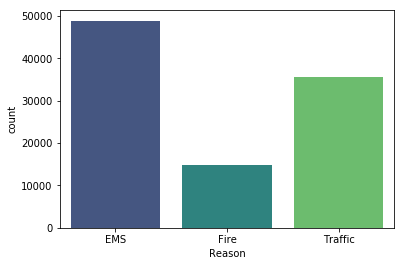

In [22]:
sns.countplot(x='Reason',data=df, palette='viridis')

In [23]:
#converting timeStamp column from string to time
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [24]:
#creating Hour,Month,Day columns
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x: x.dayofweek)

In [27]:
#premap Day of Week values from numeric index to real names
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [28]:
df['Day of Week']=df['Day of Week'].map(dmap)

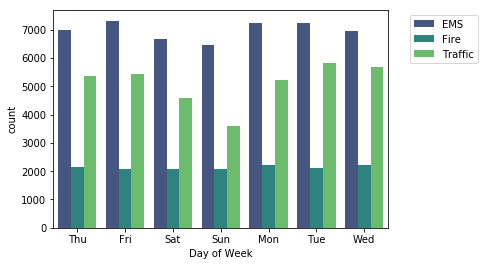

In [41]:
#distribution of calls per day of week based on reason for calling
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

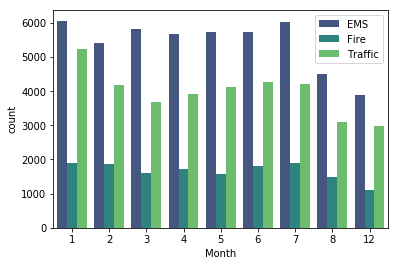

In [42]:
#monthly distribution of calls based on reason
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(loc=1)
#we're missing several months

In [45]:
byMonth = df.groupby('Month').count()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


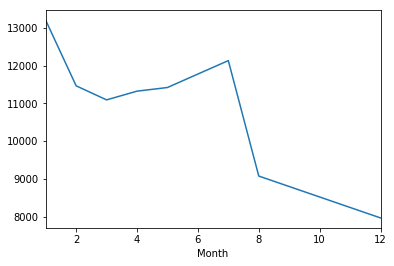

In [46]:
#extrapolating number of calls
byMonth['twp'].plot()

In [47]:
#extracting date
df['Date'] = df['timeStamp'].apply(lambda t: t.date())

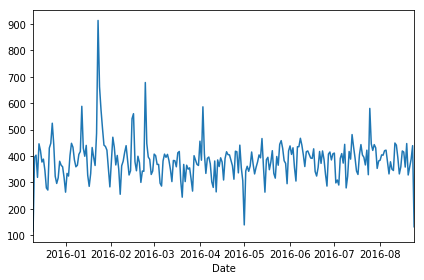

In [55]:
#number of calls during the year
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

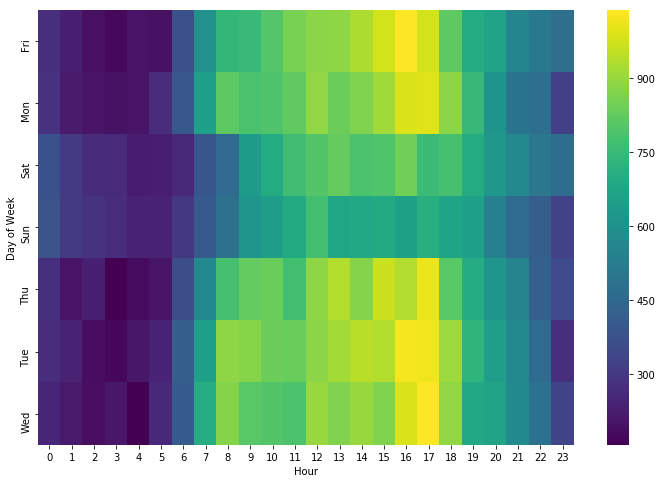

In [60]:
#creating a heatmap
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,8))
sns.heatmap(dayHour,cmap='viridis')

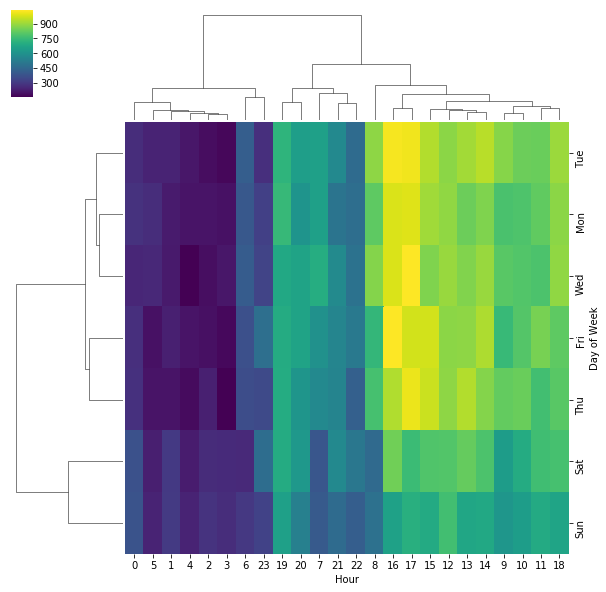

In [61]:
sns.clustermap(dayHour,cmap='viridis')

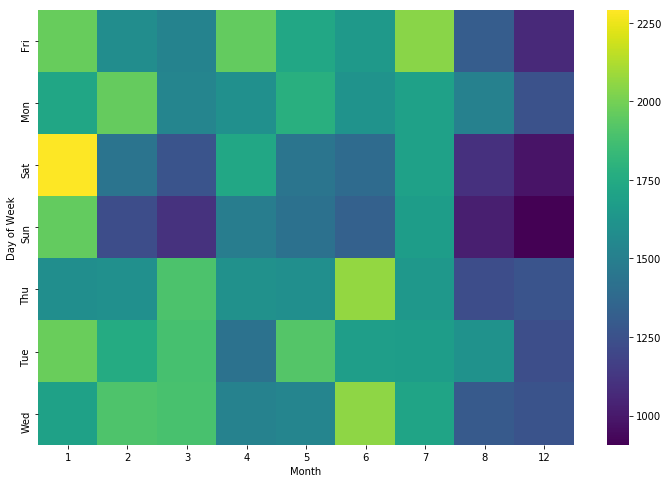

In [62]:
#same analysis on monthly level
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
plt.figure(figsize=(12,8))
sns.heatmap(dayMonth,cmap='viridis')

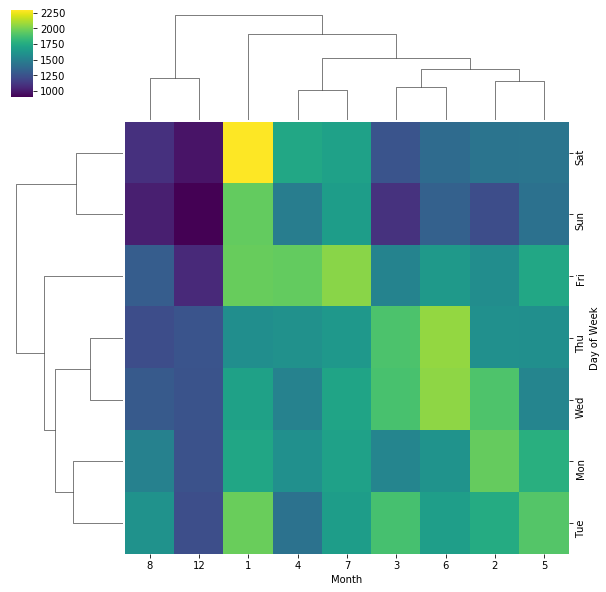

In [63]:
sns.clustermap(dayMonth,cmap='viridis')